In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compile all results from the polymer experiments

In [29]:
import matplotlib.pyplot as plt 
plt.style.use(['science', 'nature'])

import pandas as pd
from glob import glob 
from pathlib import Path

from gpt3forchem.helpers import mean_confidence_interval, get_else_nan

from fastcore.utils import load_pickle

import pandas as pd 

## Classification

In [30]:
all_results = glob('results/20220913_polymer_classification/*.pkl')

In [31]:
loaded_res = load_pickle(all_results[0])

In [32]:
cm = loaded_res['cm']

In [34]:
compiled_results = []
compiled_baseline_results = []

for res in all_results: 
    loaded_res = load_pickle(res)
    
    res = {
        'accuracy': get_else_nan(loaded_res['cm'], "ACC_Macro"),
        'f1_macro': get_else_nan(loaded_res['cm'], "F1_Macro"),
        'f1_micro': get_else_nan(loaded_res['cm'], "F1_Micro"),
        'mcc': get_else_nan(loaded_res['cm'], "Overall_MCC"),
        "train_size": loaded_res['train_size'],
    }
    baseline_res = {
        'baseline_accuracy': get_else_nan(loaded_res['baseline_cm'],"ACC_Macro"),
        'baseline_f1_macro': get_else_nan(loaded_res['baseline_cm'], "F1_Macro"),
        'baseline_f1_micro': get_else_nan(loaded_res['baseline_cm'], "F1_Micro"),
        'baseline_mcc': get_else_nan(loaded_res['baseline_cm'],"Overall_MCC"),
        "train_size": loaded_res['train_size'],
    }
    compiled_results.append(res)
    compiled_baseline_results.append(baseline_res)

In [35]:
compiled_results = pd.DataFrame(compiled_results)
compiled_baseline_results = pd.DataFrame(compiled_baseline_results)

In [39]:
compiled_results_agg = compiled_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis,

In [40]:
compiled_results_agg

accuracy            \
                mean       std   
train_size                       
10          0.681760  0.002147   
50          0.723400  0.018981   
100         0.773867  0.018037   
200         0.894000  0.003960   
500         0.920800       NaN   
2000        0.928800       NaN   
3000        0.936000       NaN   

                                                               f1_macro  \
                                     mean_confidence_interval      mean   
train_size                                                                
10          (0.68176, 0.6790946126990102, 0.6844253873009899)  0.096966   
50           (0.7234, 0.6931974835258059, 0.7536025164741942)  0.236068   
100         (0.7738666666666667, 0.7290602772142287, 0.818...  0.329169   
200         (0.8939999999999999, 0.858422626737989, 0.9295...  0.731222   
500                            (0.9207999999999998, nan, nan)  0.801065   
2000                           (0.9288000000000001, nan, nan)  0.819867   
3000                           (0.9359999999999999, nan, nan)  0.840286   

                                                                         \
                 std                           mean_confidence_interval   
train_size                                                                
10          0.026567  (0.0969655790113795, 0.063978053386821, 0.1299...   
50          0.044496  (0.23606761814068286, 0.16526490219441142, 0.3...   
100         0.097094  (0.32916852524423157, 0.08797338168211835, 0.5...   
200         0.012927  (0.7312220158875843, 0.6150816187065343, 0.847...   
500              NaN                     (0.8010654752764275, nan, nan)   
2000             NaN                     (0.8198672762663095, nan, nan)   
3000             NaN                     (0.8402864844050828, nan, nan)   

            f1_micro            \
                mean       std   
train_size                       
10          0.204400  0.005367   
50          0.308500  0.047452   
100         0.434667  0.045092   
200         0.735000  0.009899   
500         0.802000       NaN   
2000        0.822000       NaN   
3000        0.840000       NaN   

                                                                    mcc  \
                                     mean_confidence_interval      mean   
train_size                                                                
10          (0.2044, 0.19773653174752528, 0.2110634682524747)  0.010125   
50          (0.3085, 0.23299370881451448, 0.3840062911854855)  0.154598   
100         (0.4346666666666667, 0.32265069303557203, 0.54...  0.323542   
200           (0.735, 0.6460565668449753, 0.8239434331550247)  0.671387   
500                                         (0.802, nan, nan)  0.752858   
2000                                        (0.822, nan, nan)  0.778279   
3000                                         (0.84, nan, nan)  0.800384   

                                                                         
                 std                           mean_confidence_interval  
train_size                                                               
10          0.049528  (0.010125047428120603, -0.05137199528834212, 0...  
50          0.063290  (0.15459764475456475, 0.053888721725191435, 0....  
100         0.036187  (0.32354231468552574, 0.23364979260530008, 0.4...  
200         0.013146  (0.6713866412576392, 0.553270536852571, 0.7895...  
500              NaN                     (0.7528580708143884, nan, nan)  
2000             NaN                     (0.7782789891279249, nan, nan)  
3000             NaN                     (0.8003842767013699, nan, nan)

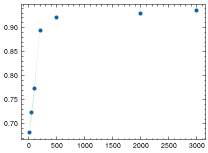

In [45]:
plt.scatter(compiled_results_agg.index, compiled_results_agg['accuracy']['mean'],  label='GPT-3')

plt.fill_between(compiled_results_agg.index, compiled_results_agg['accuracy']['mean'], compiled_results_agg['accuracy']['mean']- compiled_results_agg['accuracy']['std'],
compiled_results_agg['accuracy']['mean']+ compiled_results_agg['accuracy']['std'],
 alpha=0.2)

## Polymer regression

In [46]:
all_regression_results = glob('results/20220913_polymer_regression/*.pkl')

In [47]:
load_pickle(all_regression_results[0])

{'model_type': 'ada',
 'train_set_size': 50,
 'prefix': '',
 'train_size': 50,
 'test_size': 3075,
 'completions': {'choices': [<OpenAIObject at 0x28d4c2090> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " -9.6@@@@@@8."
   },
   <OpenAIObject at 0x28d4c27c0> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " -9.6@@@@@@8."
   },
   <OpenAIObject at 0x28d4c8360> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " -9.6@@@@@@8."
   },
   <OpenAIObject at 0x28d4c84a0> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " -9.6@@@@@@8."
   },
   <OpenAIObject at 0x28d4c8090> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " -9.6@@@@@@8."
   },
   <OpenAIObject at 0x28d4c8220> JSON: {
     "finish_reason": "length",
     "index": 5,
     "logprobs": null,
     "text": " -9.6@@@

In [ ]:
compiled_regression_results = []
compiled_regression_baseline_results = []

for res in all_regression_results:
    